In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
filename = "https://raw.githubusercontent.com/mhan1/DAV-5400/master/forestfires.csv"
    
forest_df = pd.read_csv(filename)

In [248]:
# sanity check
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Part 1: Introduction - A brief summary of the type of data you've chosen to work with and the research question you hope to answer with it.

- web link to the original location of the data :
https://archive.ics.uci.edu/ml/datasets/Forest+Fires

- Brief summary of the dataset and the questions I hope to answer:

This dataset is a real-world data collected from the northeast region of Portugal to predict the burned area of forest fires by using meteorological and other data. It is publicly available for research, and the details are described in [Cortez and Morais, 2007] http://www3.dsi.uminho.pt/pcortez/fires.pdf. 

The dataset contains 13 attributes including x,y axes spatial coordinates, month, day, FFMC, DMC, DC, ISI indices, temerature in Celsius degrees, relative humidity(%), wind speed(km/h), rain(mm/m2), the burned area of the forest(in ha).

The questions I hope to asnwer by analyzing the dataset is as below:

1. Which meteorological variables is correlated to the burned area of forest fire?
2. From question 1, how is it related? no relationship? strong relationship?
3. Which mateorological variables are more significantly affecting the forest fire?
4. Which month of the year has the most forest fire?
5. Which day of week has the most forest fire?

I would like to know which meteorological variables influence the forest fire. I want to be able to predict the forest fire based on a variable or multiple variables. To solve these questions, I will perform correlation analysis to see if any two numeric variables have any relationship, especially between the burned area of forest(dependent variable) and one of the meteorological variables(independent variables), so that I can find the independent variable(meteorological variable) that can be used as the best predictor of the burned area of forest(dependent variable). Also, I will assess which month of the year and which day of the week has the most forest fire, so that I can provide insights on the seasonality of the forest fire.

- Attribute Information: 
 1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
 2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
 3. month - month of the year: 'jan' to 'dec' 
 4. day - day of the week: 'mon' to 'sun' 
 5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
 6. DMC - DMC index from the FWI system: 1.1 to 291.3 
 7. DC - DC index from the FWI system: 7.9 to 860.6 
 8. ISI - ISI index from the FWI system: 0.0 to 56.10 
 9. temp - temperature in Celsius degrees: 2.2 to 33.30 
 10. RH - relative humidity in %: 15.0 to 100 
 11. wind - wind speed in km/h: 0.40 to 9.40 
 12. rain - outside rain in mm/m2 : 0.0 to 6.4 
 13. area - the burned area of the forest (in ha): 0.00 to 1090.84).

## Part 2: Data Summary - Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc.

- I acquired my data from: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [249]:
# checking if there is null value in each column
forest_df.isnull().any(axis=0)

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [250]:
forest_df.shape

(517, 13)

In [251]:
# checking the data types
forest_df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

- My dataset meets the requirements for the Proejct 2 data set that should include at least two (2) numeric variables and one (1) categorical variable.

In [252]:
forest_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

- Part 2 answer: Since there is no null values in every column, the use cases in my data set are the row numbers, which is 517. And there are 13 columns, which are attributes in each use case. The data type of each attributes are shown above, as the output from the "forest_df.dtypes". Also the 13 attributes are shown as the output from the "forest_df.columns" above.

- Attribute Information: 
 1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
 2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
 3. month - month of the year: 'jan' to 'dec' 
 4. day - day of the week: 'mon' to 'sun' 
 5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
 6. DMC - DMC index from the FWI system: 1.1 to 291.3 
 7. DC - DC index from the FWI system: 7.9 to 860.6 
 8. ISI - ISI index from the FWI system: 0.0 to 56.10 
 9. temp - temperature in Celsius degrees: 2.2 to 33.30 
 10. RH - relative humidity in %: 15.0 to 100 
 11. wind - wind speed in km/h: 0.40 to 9.40 
 12. rain - outside rain in mm/m2 : 0.0 to 6.4 
 13. area - the burned area of the forest (in ha): 0.00 to 1090.84).

## Part 3: Exploratory Data Analysis (EDA) - Provide summay statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings.

In [253]:
# descriptive statistics for entire columns in dataset
forest_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [254]:
#checking descriptive statistics for "month"(categorical ordinal data) column
forest_df.month.describe()

count     517
unique     12
top       aug
freq      184
Name: month, dtype: object

In [255]:
#checking descriptive statistics for "day"(categorical ordinal data) column
forest_df.day.describe()

count     517
unique      7
top       sun
freq       95
Name: day, dtype: object

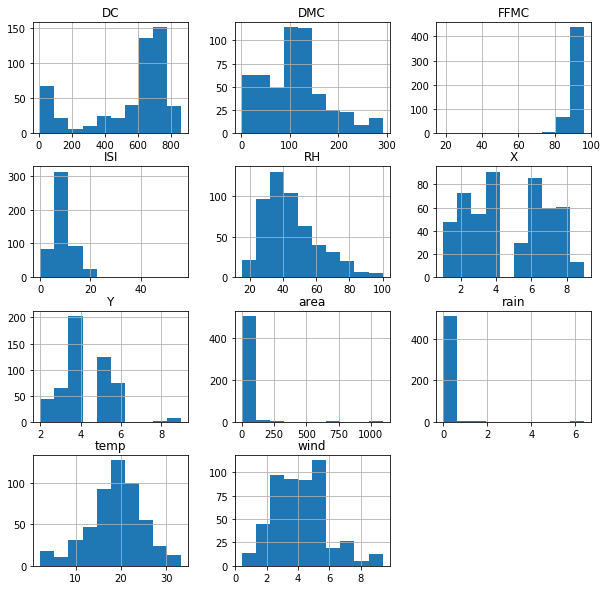

In [256]:
#histogram of each numeric variable
forest_df.hist(figsize=[10,10]);

- By checking out the histograms of each variable briefly, I think I should investigate the "area" dependant variable further, as it is right-skewed, and it has a lot of zero(0) values.
Other independant variables have different distribution respectively. I did not generate the histogram using matplotlib and seaborn here, because the respective matplotlib and seaborn functions for histogram do not skip those categorical ordinal data such as 'month' and 'day' columns that are not appropriate for histogram. However, for individual column in the dataset, I generated graphical visualization of each column by using both Matplotlib and Seaborn whenever appropriate.

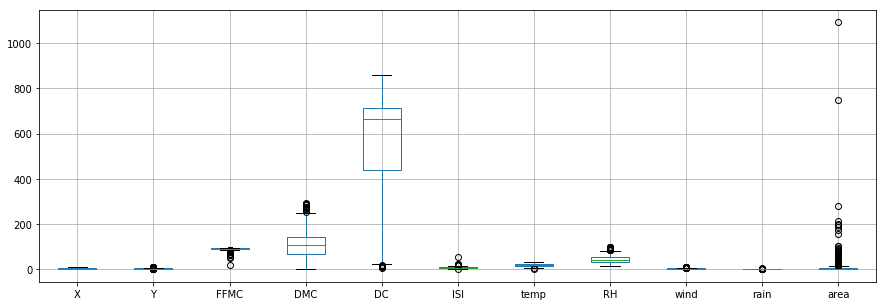

In [257]:
# boxplot of each numeric variable
forest_df.boxplot(figsize=[15,5]);

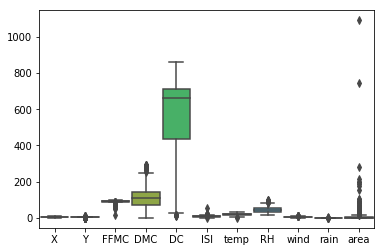

In [258]:
#Seaborn boxplot of each variable
sns.boxplot(data=forest_df, width=0.9);

- I checked the boxplot of each variable as above, and I noticed that "area" dependant variable needs further investigation for more meaningful research, as it is right-skewed, having a lot of zero values(0) and outliers. Other independant variables have decent distribution, without too many outliers, based on the boxplot above. I will use these independant variables as they are.

C:\Users\Minyeong\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


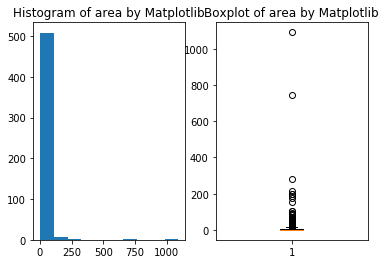

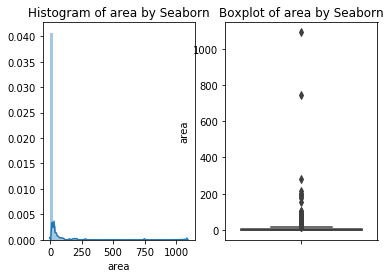

In [259]:
# histogram and boxplot of "area" column by Matplotlib
plt.figure(1)
plt.subplot(121)
plt.hist(forest_df.area)
plt.title('Histogram of area by Matplotlib')

plt.subplot(122)
plt.boxplot(forest_df.area)
plt.title('Boxplot of area by Matplotlib')


# histogram and boxplot of "area" column by Seaborn
plt.figure(2)
plt.subplot(121)
sns.distplot(forest_df.area)
plt.title('Histogram of area by Seaborn')

plt.subplot(122)
sns.boxplot(forest_df.area, orient = 'v')
plt.title('Boxplot of area by Seaborn')


plt.show();

In [260]:
forest_df['area'].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
2.14       2
2.18       2
1.56       2
9.96       2
28.66      2
1.46       2
0.68       2
0.43       2
1.64       2
6.43       2
9.27       2
0.52       2
1.75       2
11.06      2
1.63       2
17.20      1
48.55      1
0.95       1
0.77       1
11.19      1
15.64      1
2.64       1
3.52       1
38.48      1
5.39       1
        ... 
1.61       1
1.07       1
6.38       1
5.86       1
3.19       1
11.16      1
8.85       1
86.45      1
5.18       1
30.18      1
2.01       1
1.01       1
20.03      1
0.79       1
49.59      1
4.41       1
7.02       1
0.71       1
9.41       1
0.09       1
3.32       1
11.53      1
5.55       1
3.20       1
4.88       1
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

- Based on the histogram and boxplot, and the value_counts output, the "area" dependent variable has total 247 zero(0) values. By referring to the related paper cited above, all entries denote fire occurrences and zero value means that an area lower than 1ha/100 = 100m^2 was burned. Hence, to reduce skewness and improve symmetry of the distribution of the dependant variable "area", the logarithm function ln(x+1) will be used to transform the right-skewed "area" column for more meaningful statistical analysis going forward.

In [261]:
# transforming the "area" column by applying the logarithm function y=ln(x+1)
forest_df['area'] = np.log(forest_df.area + 1)

In [262]:
# changing the name of "area" column into "trans_area" in the dataset
forest_df.rename(columns={'area':'t_area'}, inplace=True)

In [263]:
#checking the columns in the dataset
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,t_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


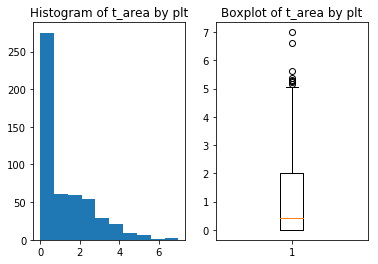

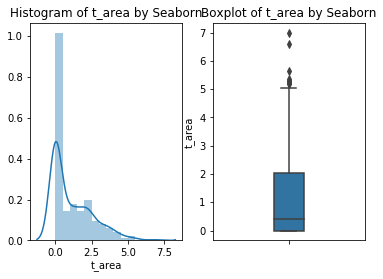

In [264]:
# histogram and boxplot of "t_area" column by Matplotlib
plt.figure(3)
plt.subplot(121)
plt.hist(forest_df.t_area)
plt.title('Histogram of t_area by plt')

plt.subplot(122)
plt.boxplot(forest_df.t_area)
plt.title('Boxplot of t_area by plt')


# histogram and boxplot of "area" column by Seaborn
plt.figure(2)
plt.subplot(121)
sns.distplot(forest_df.t_area)
plt.title('Histogram of t_area by Seaborn')

plt.subplot(122)
sns.boxplot(forest_df.t_area, orient = 'v', width=0.2)
plt.title('Boxplot of t_area by Seaborn')


plt.show();

- Based on the histogram and the boxplot above after transforming the "area" column, I can see the distribution of area variable has reduced skewness and improved symmetry. I can conduct further analysis using this transformed area variable.

In [265]:
# checking the columns in the dataset
forest_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 't_area'],
      dtype='object')

In [266]:
# I am using only 'month', 'day', temp', 'RH', 'wind', 'rain', 't-area' columns for further analysis.
my_df = pd.DataFrame(forest_df, columns=['month', 'day', 'temp', 'RH', 'wind', 'rain', 't_area']) 

In [267]:
# sanity check
my_df.head()

,month,day,temp,RH,wind,rain,t_area
0,mar,fri,8.2,51,6.7,0.0,0.0
1,oct,tue,18.0,33,0.9,0.0,0.0
2,oct,sat,14.6,33,1.3,0.0,0.0
3,mar,fri,8.3,97,4.0,0.2,0.0
4,mar,sun,11.4,99,1.8,0.0,0.0


- Provide summary statistics for each attribute.
- provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn.

(1) Summary statistics for each attribute from my_df dataset.

In [268]:
my_df.describe()

,temp,RH,wind,rain,t_area
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663,1.111026
std,5.806625,16.317469,1.791653,0.295959,1.398436
min,2.200000,15.000000,0.400000,0.000000,0.000000
25%,15.500000,33.000000,2.700000,0.000000,0.000000
50%,19.300000,42.000000,4.000000,0.000000,0.418710
75%,22.800000,53.000000,4.900000,0.000000,2.024193
max,33.300000,100.000000,9.400000,6.400000,6.995620


In [269]:
my_df.month.describe()

count     517
unique     12
top       aug
freq      184
Name: month, dtype: object

In [270]:
my_df.day.describe()

count     517
unique      7
top       sun
freq       95
Name: day, dtype: object

- I provided desriptive statistics for numeric variables in the table above, and "month" and "day" categorical ordinal variables are shown below the table, separately. 

(2) Appropriate graphical analysis for each attribute using both Matplotlib and Seaborn.

(2)-1 "month" attribute graphical analysis: Since "month" variable is categorical ordinal data, I will generate the bar graph for graphical analysis as below.

In [271]:
month_count = my_df['month'].value_counts()

In [272]:
month_count

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

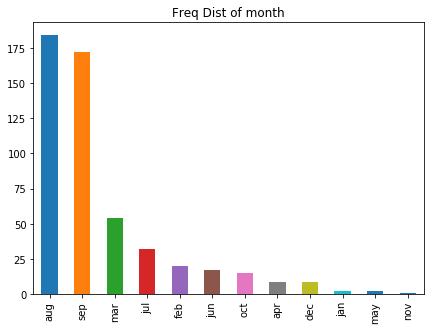

In [273]:
month_count.plot.bar(title="Freq Dist of month", figsize=(7,5));

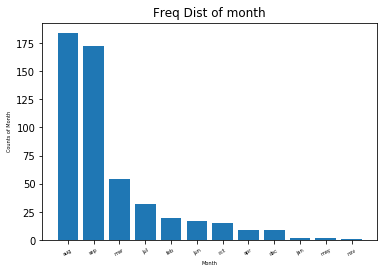

In [274]:
#bar grapho by Matplotlib
label1 = ['aug', 'sep', 'mar', 'jul', 'feb', 'jun', 'oct', 'apr', 'dec', 'jan', 'may', 'nov']
month_count1 = [184, 172, 54, 32, 20, 17, 15, 9, 9, 2, 2, 1]
index1 = np.arange(len(label1))
plt.bar(index1, month_count1)
plt.xlabel('Month', fontsize=5)
plt.ylabel('Counts of Month', fontsize=5)
plt.xticks(index1, label1, fontsize=5, rotation=30)
plt.title("Freq Dist of month")
plt.show();

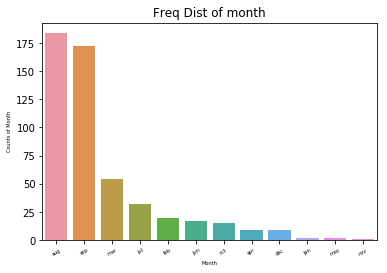

In [275]:
#bar graph by Seaborn

label1 = ['aug', 'sep', 'mar', 'jul', 'feb', 'jun', 'oct', 'apr', 'dec', 'jan', 'may', 'nov']
month_count1 = [184, 172, 54, 32, 20, 17, 15, 9, 9, 2, 2, 1]
index1 = np.arange(len(label1))
sns.barplot(index1, month_count1)

#Seaborn does not have xlabel, etc. attributes, so I used plt.xlabel, etc. for labeling.
plt.xlabel('Month', fontsize=5)
plt.ylabel('Counts of Month', fontsize=5)
plt.xticks(index1, label1, fontsize=5, rotation=30)
plt.title("Freq Dist of month")

plt.show();


(2)-2 "day" attribute graphical analysis: bar graph, as it is categorical ordinal data.

In [276]:
my_df.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

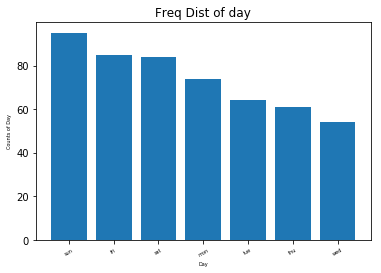

In [277]:
#bar grapho by Matplotlib
label2 = ['sun', 'fri', 'sat', 'mon', 'tue', 'thu', 'wed']
day_count2 = [95, 85, 84, 74, 64, 61, 54]
index2 = np.arange(len(label2))
plt.bar(index2, day_count2)
plt.xlabel('Day', fontsize=5)
plt.ylabel('Counts of Day', fontsize=5)
plt.xticks(index2, label2, fontsize=5, rotation=30)
plt.title("Freq Dist of day")
plt.show();

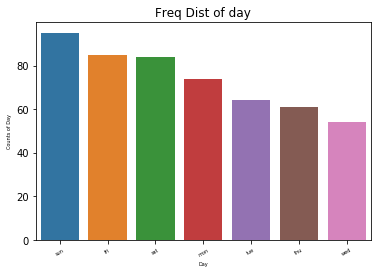

In [278]:
#bar grapho by Seaborn
label2 = ['sun', 'fri', 'sat', 'mon', 'tue', 'thu', 'wed']
day_count2 = [95, 85, 84, 74, 64, 61, 54]
index2 = np.arange(len(label2))
sns.barplot(index2, day_count2)

#Seaborn does not have xalabel, etc. attributes, so I used plt.xlabel, etc. for labeling.
plt.xlabel('Day', fontsize=5)
plt.ylabel('Counts of Day', fontsize=5)
plt.xticks(index2, label2, fontsize=5, rotation=30)
plt.title("Freq Dist of day")
plt.show();

In [279]:
my_df.columns

Index(['month', 'day', 'temp', 'RH', 'wind', 'rain', 't_area'], dtype='object')

(2)-3 'temp', 'RH', 'wind', 'rain', 't-area': these variables are all numeric, so histogram and boxplot will be graphical analysis. They are shown below.

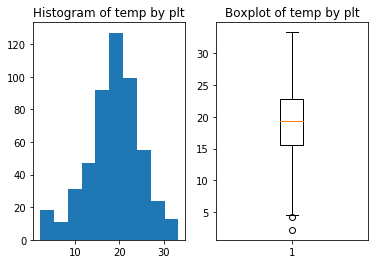

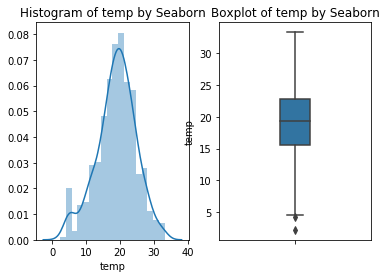

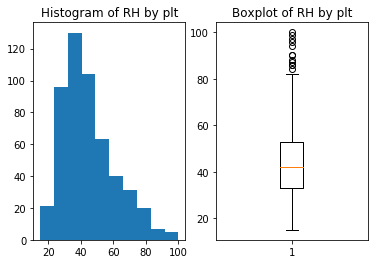

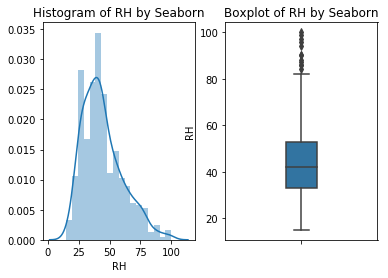

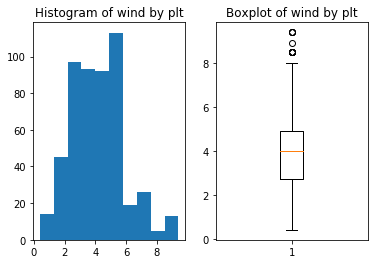

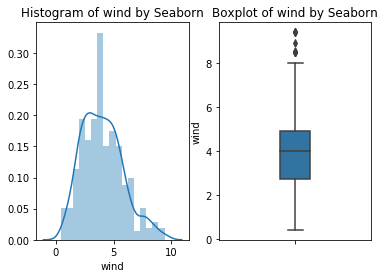

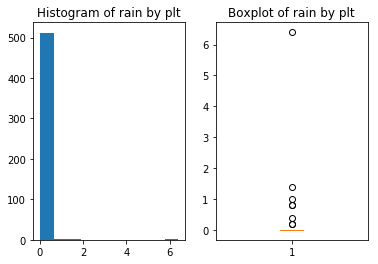

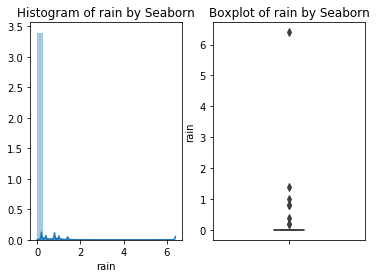

In [280]:
# histogram and boxplot of "temp" column by Matplotlib
plt.figure(4)
plt.subplot(121)
plt.hist(my_df.temp)
plt.title('Histogram of temp by plt')

plt.subplot(122)
plt.boxplot(my_df.temp)
plt.title('Boxplot of temp by plt')


# histogram and boxplot of "temp" column by Seaborn
plt.figure(5)
plt.subplot(121)
sns.distplot(my_df.temp)
plt.title('Histogram of temp by Seaborn')

plt.subplot(122)
sns.boxplot(my_df.temp, orient = 'v', width=0.2)
plt.title('Boxplot of temp by Seaborn')

# histogram and boxplot of "RH" column by Matplotlib
plt.figure(6)
plt.subplot(121)
plt.hist(my_df.RH)
plt.title('Histogram of RH by plt')

plt.subplot(122)
plt.boxplot(my_df.RH)
plt.title('Boxplot of RH by plt')


# histogram and boxplot of "RH" column by Seaborn
plt.figure(7)
plt.subplot(121)
sns.distplot(my_df.RH)
plt.title('Histogram of RH by Seaborn')

plt.subplot(122)
sns.boxplot(my_df.RH, orient = 'v', width=0.2)
plt.title('Boxplot of RH by Seaborn')


# histogram and boxplot of "wind" column by Matplotlib
plt.figure(8)
plt.subplot(121)
plt.hist(my_df.wind)
plt.title('Histogram of wind by plt')

plt.subplot(122)
plt.boxplot(my_df.wind)
plt.title('Boxplot of wind by plt')


# histogram and boxplot of "wind" column by Seaborn
plt.figure(9)
plt.subplot(121)
sns.distplot(my_df.wind)
plt.title('Histogram of wind by Seaborn')

plt.subplot(122)
sns.boxplot(my_df.wind, orient = 'v', width=0.2)
plt.title('Boxplot of wind by Seaborn')


# histogram and boxplot of "rain" column by Matplotlib
plt.figure(10)
plt.subplot(121)
plt.hist(my_df.rain)
plt.title('Histogram of rain by plt')

plt.subplot(122)
plt.boxplot(my_df.rain)
plt.title('Boxplot of rain by plt')


# histogram and boxplot of "rain" column by Seaborn
plt.figure(11)
plt.subplot(121)
sns.distplot(my_df.rain)
plt.title('Histogram of rain by Seaborn')

plt.subplot(122)
sns.boxplot(my_df.rain, orient = 'v', width=0.2)
plt.title('Boxplot of rain by Seaborn')


plt.show();

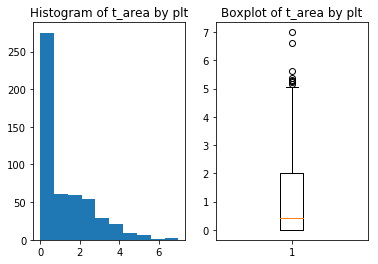

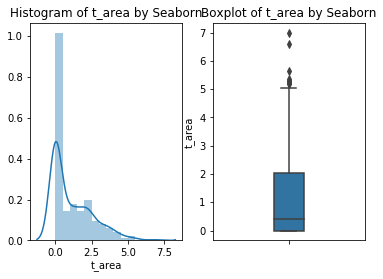

In [281]:
# histogram and boxplot of "t_area" column by Matplotlib
plt.figure(12)
plt.subplot(121)
plt.hist(my_df.t_area)
plt.title('Histogram of t_area by plt')

plt.subplot(122)
plt.boxplot(my_df.t_area)
plt.title('Boxplot of t_area by plt')


# histogram and boxplot of "t_area" column by Seaborn
plt.figure(5)
plt.subplot(121)
sns.distplot(my_df.t_area)
plt.title('Histogram of t_area by Seaborn')

plt.subplot(122)
sns.boxplot(my_df.t_area, orient = 'v', width=0.2)
plt.title('Boxplot of t_area by Seaborn')

plt.show();

## Part 4: Inference - Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic, and for each graphic you create you must do so using both Matplotlib and Seaborn (as described in Part 3 above). Include a narrative explaining your research approach and findings.

Questions:
 1.Which meteorological variables is correlated to the burned area of forest fire?
 
 2.From question 1, how is it related? no relationship? strong relationship?
 
 3.Which mateorological variables are more significantly affecting the forest fire?
 
 4.Which month of the year has the most forest fire?
 
 5.Which day of week has the most forest fire?


In [282]:
my_df.corr()

,temp,RH,wind,rain,t_area
temp,1.000000,-0.527390,-0.227116,0.069491,0.053487
RH,-0.527390,1.000000,0.069410,0.099751,-0.053662
wind,-0.227116,0.069410,1.000000,0.061119,0.066973
rain,0.069491,0.099751,0.061119,1.000000,0.023311
t_area,0.053487,-0.053662,0.066973,0.023311,1.000000


- Based on the above correlation table, there are some correlations between the variables, however, they are not aht strong as they are close to 0, rather than 1.
- I can say that the temperature, wind, and rain variable have positive correlation with forest fire(t_area), and relative humidity has negative correlation with forest fire, meaning if the relative humidity is high, the less likely the forest fire will occur, which makes sense in real life.

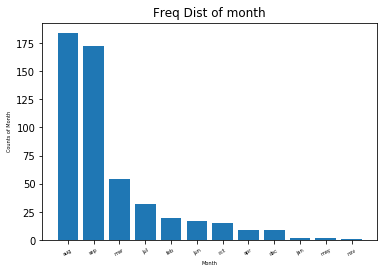

In [283]:
# which month of the year has the most forest fire?

#bar grapho by Matplotlib
label1 = ['aug', 'sep', 'mar', 'jul', 'feb', 'jun', 'oct', 'apr', 'dec', 'jan', 'may', 'nov']
month_count1 = [184, 172, 54, 32, 20, 17, 15, 9, 9, 2, 2, 1]
index1 = np.arange(len(label1))
plt.bar(index1, month_count1)
plt.xlabel('Month', fontsize=5)
plt.ylabel('Counts of Month', fontsize=5)
plt.xticks(index1, label1, fontsize=5, rotation=30)
plt.title("Freq Dist of month")

plt.show();


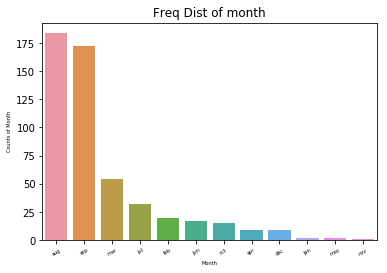

In [284]:
#bar graph by Seaborn

label1 = ['aug', 'sep', 'mar', 'jul', 'feb', 'jun', 'oct', 'apr', 'dec', 'jan', 'may', 'nov']
month_count1 = [184, 172, 54, 32, 20, 17, 15, 9, 9, 2, 2, 1]
index1 = np.arange(len(label1))
sns.barplot(index1, month_count1)

#Seaborn does not have xlabel, etc. attributes, so I used plt.xlabel, etc. for labeling.
plt.xlabel('Month', fontsize=5)
plt.ylabel('Counts of Month', fontsize=5)
plt.xticks(index1, label1, fontsize=5, rotation=30)
plt.title("Freq Dist of month")

plt.show();

- Baed on the bar graph above, August is the month that has the most forest fire.

In [285]:
# Which day of week has the most forest fire?

my_df.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

- Based on the above output, Sunday has the most forest fire, which is 95.

## Part 5: Conclusion - A brief, concise narrative explaining your conclusions.

• There are some correlations between the variables, 
however, they are not aht strong as they are close to 0, rather than 1.
•I can say that the temperature, wind, and rain variable have positive correlation 
with forest fire(t_area), and relative humidity has negative correlation with forest fire, 
meaning if the relative humidity is high, the less likely the forest fire will occur, 
which makes sense in real life. The more drier the weather, there will be more chance to have
forest fire, so the fire department should be more prepared during the dry season.
• August is the month that has the most forest fire. I think this is because
August is summer time, and there is more camp fire in the wild forest, which can
cause more forest fire during August. 
• Sunday has the most forest fire, which is 95. Again, I think Sunday is weekend, which is a good time to go camping in the forest, which increases the chance of forest fire.
- Taken all together, drier season, and Summer time such as August, weekend such as Sunday is the time when the most forest fire occur. Hence, the fire department should be aware of these and be prepared for the emrgencies.

## References - Be sure to include proper citations for any references you may have relied on as part of your work.

Web : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

http://www.wine-economics.org/aawe/wp-content/uploads/2013/07/Cicchetti_Cicchetti.pdf